# 迴歸模型練習

In [2]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X, y = make_regression(n_samples=50, n_features=1, noise=3)

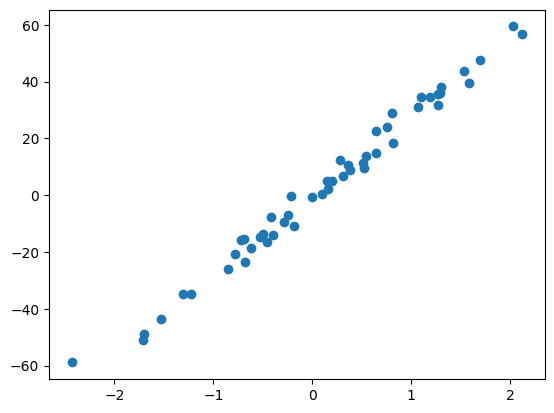

In [14]:
# 資料視覺化
plt.scatter(X, y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

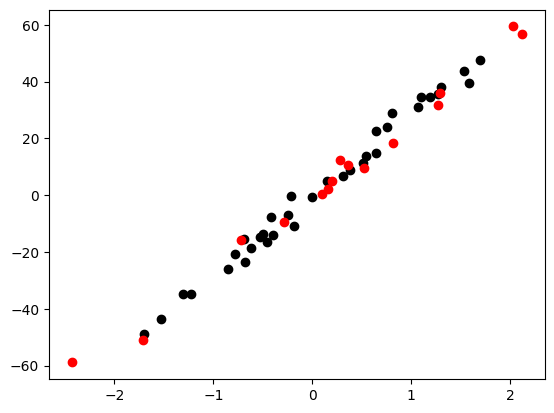

In [19]:
#黑點為訓練及資料，紅點為測試集資料
plt.scatter(X_train, y_train, color= 'black')
plt.scatter(X_test, y_test, color= 'red')

### 簡單線性迴歸